In [12]:
import sys  
sys.path.insert(0, '/home/poyraden/Analysis/josie_trrm_analysis/codes/functions/')

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from plotting_functions import filter_rdif_all
from data_cuts import cuts0910, cuts2017
from analyse_functions import calc_average_df_pressure, set_columns_nopair_dependence


In [19]:
df = pd.read_csv(f"/home/poyraden/Analysis/JOSIEfiles/Proccessed/"
                    f"Josie0910_deconv_2023_unitedpaper.csv", low_memory=False)
dfs = pd.read_csv(f"/home/poyraden/Analysis/JOSIEfiles/Proccessed/"
                    f"Josie0910_deconv_2023_unitedpaper_sm_hv.csv", low_memory=False)

In [20]:
df = cuts0910(df)
dfs = cuts0910(dfs)


In [21]:
df['Ifast_minib0_deconv_sm10'] = df['Ifast_minib0_deconv_ib1_decay'].rolling(window=5, center=True).mean()
dfs['Ifast_minib0_deconv_sm10'] = dfs['Ifast_minib0_deconv_ib1_decay']


In [22]:
prof = filter_rdif_all(df)
profs = filter_rdif_all(dfs)

profEN0505 15
profEN1010 25
profEN1001 0
profSP0505 20
profSP1010 23
profSP1001 0
profEN0505 15
profEN1010 25
profEN1001 0
profSP0505 20
profSP1010 23
profSP1001 0


In [24]:
i = 0
dfi = prof[i]
dfsi = profs[i]

In [25]:
dfi['PO3_trrm'] = 0.043085 * dfi['Tpump_cor'] * (dfi['Ifast_minib0_deconv_sm10']) / \
                         (1 * dfi['PFcor_jma'])
dfsi['PO3_trrm'] = 0.043085 * dfsi['Tpump_cor'] * (dfsi['Ifast_minib0_deconv_sm10']) / \
                         (1 * dfsi['PFcor_jma'])

/home/poyraden/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/poyraden/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [29]:
yrefd = [1000, 850, 700, 550, 400, 350, 300, 200, 150, 100, 75, 50, 35,30, 25, 15,9, 8, 6]
column_list = ['Pair','Tsim','IM','Ifast_minib0_deconv_sm10','TPext', 'Tpump_cor','PO3','PO3_dqa',
                       'PO3_trrm','Cpf_kom', 'Cpf_jma','unc_Cpf_kom','unc_Cpf_jma']

dfp = calc_average_df_pressure(dfi, column_list, yrefd)
nop_columns = ['PFcor', 'iB0', 'iB1', 'iB2']
dfp = set_columns_nopair_dependence(dfi, dfp,  nop_columns)

dfsp = calc_average_df_pressure(dfsi, column_list, yrefd)
nop_columns = ['PFcor', 'iB0', 'iB1', 'iB2']
dfsp = set_columns_nopair_dependence(dfsi, dfsp,  nop_columns)

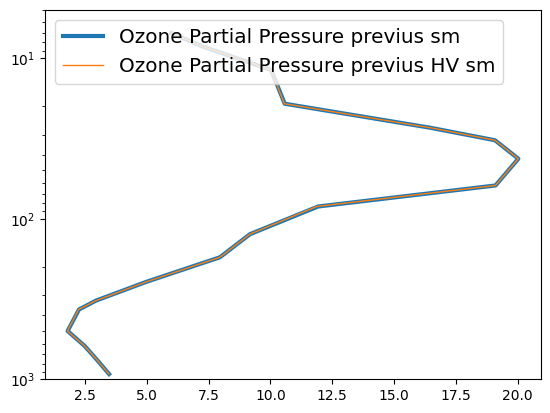

In [31]:
plt.yscale('log')
plt.ylim([1000, 5])
plt.plot(dfp['PO3_trrm'], dfp['Pair'],  label=f'Ozone Partial Pressure previus sm', linewidth=3)
plt.plot(dfsp['PO3_trrm'], dfsp['Pair'], label=f'Ozone Partial Pressure previus HV sm', linewidth=1)

plt.legend(loc='upper left', frameon=True, fontsize='x-large', markerscale=3)

